<img src="assets/images/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Decision Trees, Random Forests and Boosting
 

---

## <font style = 'color:blue'>Housekeeping</font>




## Final Project Deliverable

In terms of this deliverable, we want you to lay out the EDA of the dataset that you have selected for the project, in a Jupyter notebook,

- Run through the available feature exploration with commentary and visualisations, and with the goal of outlining the suitability of the dataset for your project, any caveats with the data etc that may not fulfil the hypothesis that you've outlined. 

- We want to see how well that you understand the data that you're using, and how what you've learned will impact on the next steps of the project.

- Deadline of end of class on Thursday, submission via Github.

## Agenda

### Decision Trees

- Explain how a decision tree is created.
- Build a decision tree model in scikit-learn.
- Tune a decision tree model and explain how tuning impacts the model.
- Interpret a tree diagram.
- Describe the key differences between regression and classification trees.
- Decide whether or not a decision tree is an appropriate model for a given problem.

### Random Forests

- Understand how and why decision trees can be improved using bagging and random forests.
- Build random forest models for classification and regression.
- Know how to extract the most important predictors in a random forest model.

### Boosting 

- Look at how to use weak learners (boosting) for classification
- Tuning ML models

## <font style = 'color:blue'>Decision Trees</font>

In this lesson, we will be exploring **decision trees** and **random forests**. These are non-parametric models that can either be used for regression or classification. 




A **decision tree** is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. 



**Random forests** are groups of decision trees created using different subsets and feature sets of the training data. Each tree "votes" on a classification.

### Why are we learning about decision trees?



- They can be applied to both regression and classification problems.


- They are easy to explain to others (interpretable).


- They are very popular among data scientists.


- They are the basis for more sophisticated models.


- They have a different way of "thinking" than the other models we have studied.

## Making Decisions

Our previous machine learning models were based on fitting lines, and averaging "similar" data points

- But Data Science is about helping people make better decisions





So why not build a model that mimics decision-making?

One aspect of decision-making is creating **rules**

- "**If** it's raining, **and** my friends aren't going to the game, **then** I won't go either"

How would we represent these rules **visually**?

### Flowcharts!

![](assets/images/xkcd_flowchart.png)

[xkcd #1195](https://xkcd.com/1195)

![](assets/images/pub_decision_tree.png)

## Decision trees

Decision trees are like the game “20 questions”.  They make decision by answering a series of questions, most often binary questions (yes or no).

We want the smallest set of questions to get to the right answer.

Each questions should reduce the search space as much as possible.


Trees are a data structure made up of nodes and branches.

Each node typically has two or more branches that connect it to its children.

<img src="assets/images/trees1.png" style="width:60%" />


Each child is another node in the tree and contains its own subtree.  

Nodes without any children are known as leaf nodes.

<img src="assets/images/trees2.png" style="width:60%" />

A decision tree contains a question at every node.

- Depending upon the answer to the question, we proceed down the left or right branch of the tree and ask another question.

- Once we don’t have any more questions (at the leaf nodes), we make a prediction.

- Note:  The next question is always dependent on the last.



![](assets/images/decision_tree_terminology.png)

How do we decide what order we ask questions?

- we want to put the "most important" questions at the top

- if rain means we stay at home **no matter what**, it's the first question we should ask

### Decision trees for prediction

Instead of coming up with the rules ourselves, we want to **automatically learn** the decision tree that gives us the best predictions

We want to learn the best if-then rules that give us leaves where we output the correct predictions

Remember when we eyeballed the iris data to come up with the classifier?

Well that's what we want to automate!

Can create two kinds of decision tree:
    
   - if wishing to predict a numerical value, then use a regression tree
   - if which to predict a categorical response, then use a classification tree


### How Does a Computer Build a Decision Tree?





**Ideal approach:** Considering every possible partition of the feature space (computationally infeasible).


**"Good enough" approach:** Recursive binary splitting.



- Begin at the top of the tree.


- For **every feature**, examine **every possible cutpoint**, and choose the feature and cutpoint so that the resulting tree has the lowest possible mean squared error (MSE) for regression trees or Gini coefficient for classification trees. Make that split.




- Examine the two resulting regions. Once again, make a **single split** (in one of the regions) to minimize the MSE or Gini.


- Keep repeating Step 3 until a **stopping criterion** is met:
    - Maximum tree depth (maximum number of splits required to arrive at a leaf).
    - Minimum number of observations in a leaf.


This is a **greedy algorithm** because it makes locally optimal decisions -- it takes the best split at each step. A greedy algorithm hopes that a series of locally optimal decisions might be optimal overall; however, this is not always the case. 

For example:


- Always eating cookies to maximize your immediate happiness (greedy) might not lead to optimal overall happiness.


In our case, reorganising parts of the tree already constructed based on future splits might result in a better model overall. 

<a id="comparing-trees"></a>
## Comparing Regression Trees and Classification Trees

|Regression Trees|Classification Trees|
|---|---|
|Predict a continuous response.|Predict a categorical response.|
|Predict using mean response of each leaf.|Predict using most commonly occurring class of each leaf.|
|Splits are chosen to minimize MSE.|Splits are chosen to minimize Gini index (discussed below).|

## Splitting Criteria for Classification Trees

Common options for the splitting criteria:



- **Classification error rate:** The fraction of training observations in a region that don't belong to the most common class.


- **Gini index:** The measure of total variance across classes in a region.

Gini index varies between values 0 and 1, where 0 expresses the purity of classification, i.e. all the elements belong to a specified class or only one class exists there. And 1 indicates the random distribution of elements across various classes. The value of 0.5 of the Gini Index shows an equal distribution of elements over some classes.

### Example: Classification Error Rate

Pretend we are predicting whether or not someone will buy an iPhone or an Android:




- At a particular node, there are **25 observations** (phone buyers) of whom **10 bought iPhones and 15 bought Androids**.



- As the majority class is **Android**, that's our prediction for all 25 observations, and thus the classification error rate is **10/25 = 40%**.


Our goal in making splits is to **reduce the classification error rate**. 




Let's try splitting on gender:

- **Males:** Two iPhones and 12 Androids, thus the predicted class is Android.


- **Females:** Eight iPhones and three Androids, thus the predicted class is iPhone.



Classification error rate after this split would be **5/25 = 20%**.


Compare that with a split on age:

- **30 or younger:** Four iPhones and eight Androids, thus the predicted class is Android.

- **31 or older:** Six iPhones and seven Androids, thus the predicted class is Android.



Classification error rate after this split would be **10/25 = 40%**.



The decision tree algorithm will try **every possible split across all features** and choose the one that **reduces the error rate the most.**

### Example: Gini Index

Calculate the Gini index before making a split:

$$1 - \left(\frac {iPhone} {Total}\right)^2 - \left(\frac {Android} {Total}\right)^2 = 1 - \left(\frac {10} {25}\right)^2 - \left(\frac {15} {25}\right)^2 = 0.48$$


- The **optimum value** of the Gini index is 0.5 and occurs when the classes are perfectly balanced in a node.


- The **minimum value** of the Gini index is 0 and occurs when there is only one class represented in a node.


- A node with a lower Gini index is said to be more "pure."


Evaluating the split on **gender** using the Gini index:

$$\text{Males: } 1 - \left(\frac {2} {14}\right)^2 - \left(\frac {12} {14}\right)^2 = 0.24$$
$$\text{Females: } 1 - \left(\frac {8} {11}\right)^2 - \left(\frac {3} {11}\right)^2 = 0.40$$
$$\text{Weighted Average: } 0.24 \left(\frac {14} {25}\right) + 0.40 \left(\frac {11} {25}\right) = 0.31$$



Evaluating the split on **age** using the Gini index:

$$\text{30 or younger: } 1 - \left(\frac {4} {12}\right)^2 - \left(\frac {8} {12}\right)^2 = 0.44$$
$$\text{31 or older: } 1 - \left(\frac {6} {13}\right)^2 - \left(\frac {7} {13}\right)^2 = 0.50$$
$$\text{Weighted Average: } 0.44 \left(\frac {12} {25}\right) + 0.50 \left(\frac {13} {25}\right) = 0.47$$



Again, the decision tree algorithm will try **every possible split** and will choose the one that **reduces the Gini index (and thus increases the "node purity") the most**.



You can think of this as each split increasing the accuracy of predictions. 

- If there is some error at a node, then splitting at that node will result in two nodes with a higher average "node purity" than the original. 

- So, we ensure continually better fits to the training data by continually splitting nodes.

### Comparing Classification Error Rate and Gini Index


- Gini index is generally preferred because it will make splits that **increase node purity**, even if that split does not change the classification error rate.


- Node purity is important because we're interested in the **class proportions** in each region, as that's how we calculate the **predicted probability** of each class.


- scikit-learn's default splitting criteria for classification trees is Gini index.



<a id="sklearn-ctree"></a>
## <font style = 'color:blue'> Building a Classification Tree in `scikit-learn`</font>

We'll build a classification tree using the Iris data set:

In [15]:
# quick code to load iris and train a tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

%matplotlib inline




In [16]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["target"] = df["target"].map({idx:name for idx, name in enumerate(iris.target_names)})

df_binary_iris = df[df["target"] != "virginica"]



In [22]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

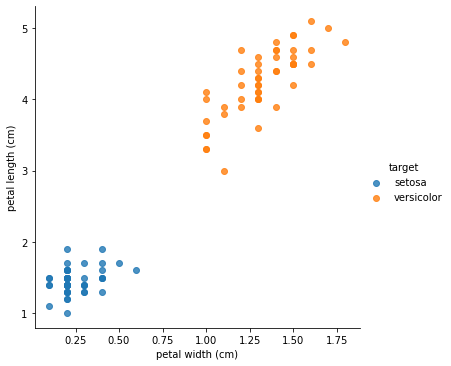

In [3]:
sns.lmplot(x="petal width (cm)", y="petal length (cm)", data=df_binary_iris, fit_reg=False, hue="target");

To create a tree diagram, we will use the Graphviz library for displaying graph data structures. 

Surprisingly, every tree is just a graph in disguise! 

A graph is a tree only if there is exactly one vertex with no incoming edge (the root), while all other vertices have exactly one incoming edge (representing its parent).

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dt = DecisionTreeClassifier(max_depth=1)
dt.fit(df_binary_iris[iris.feature_names], df_binary_iris["target"])
export_graphviz(dt, "iris.dot", feature_names=iris.feature_names)

![](assets/images/iris_tree.png)

Decision trees just "carve up" the space:

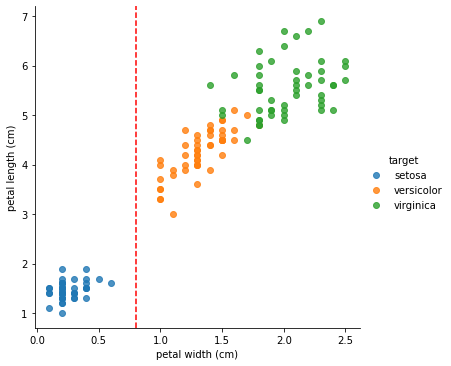

In [6]:
sns.lmplot(x="petal width (cm)", y="petal length (cm)", data=df, fit_reg=False, hue="target")
plt.axvline(.8,c="r",linestyle="dashed");

Performing a fit on all three classes gives us an accuracy score of:

In [7]:
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(df[iris.feature_names], df["target"])
print(accuracy_score(df["target"], dt.predict(df[iris.feature_names])))


0.9733333333333334


In [8]:
# At the command line, run this to convert to PNG:
#   dot -Tpng tree_vehicles.dot -o tree_vehicles.png

export_graphviz(dt, "iris_3_class.dot", feature_names=iris.feature_names)

<h4>97% Accuracy (3 classes) - from our fit above</h4>


<img src="assets/images/iris_tree_complex.png" style="width:60%" />

We can calculate the **feature importance** using the sum over the number of splits (across all tress) that include the feature, proportionally to the number of samples it splits: the higher the value, the more important it is.

In [8]:
# Compute the feature importances (the Gini index at each node).

pd.DataFrame({'feature':iris.feature_names, 'importance':dt.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
3,petal width (cm),0.946064
2,petal length (cm),0.053936
0,sepal length (cm),0.000000
1,sepal width (cm),0.000000


## <font style = 'color:blue'> Regression Trees </font>



Next, we will make decision trees that predict numeric data. Instead of returning a class, we will return a single numeric value for each set of conditions.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

# allow plots to appear in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# Vehicle data
path = 'assets/data/vehicles_train.csv'
train = pd.read_csv(path)

<a id="sklearn-tree"></a>
### Building a Regression Tree in `scikit-learn`

In [10]:
train.head()

,price,year,miles,doors,vtype
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car


In [11]:
# Encode car as 0 and truck as 1.
train['vtype'] = train.vtype.map({'car':0, 'truck':1})

In [12]:
# Define X and y.
feature_cols = ['year', 'miles', 'doors', 'vtype']

X = train[feature_cols]
y = train.price

In [13]:
# Instantiate a DecisionTreeRegressor (with random_state=1).
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(random_state=1)

In [14]:
# Use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3107.1428571428573

<a id="too-deep"></a>
### What Happens When We Grow a Tree Too Deep?

- **On the left:** A regression tree for salary that is **grown deeper**.
- **On the right:** A comparison of the **training, testing, and cross-validation errors** for trees with different numbers of leaves.


<img src="assets/images/salary_tree_deep.png" style="width:70%" />


<img src="assets/images/salary_tree_deep.png" style="width:70%" />

The **training error** continues to go down as the tree size increases (due to overfitting), but the lowest **cross-validation error** occurs for a tree with three leaves. 

Note that if we make a **complete tree** (where every data point is boxed into its own region), then we will achieve perfect training accuracy. However, then outliers in the training data will greatly affect the model.

<a id="#tuning-tree"></a>
### Tuning a Regression Tree

Let's try to reduce the RMSE by tuning the **max_depth** parameter:

In [15]:
# Try different values one by one.
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4050.1443001443

Or, we could write a loop to try a range of values:

In [16]:
# List of values to try:
max_depth_range = list(range(1, 8))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

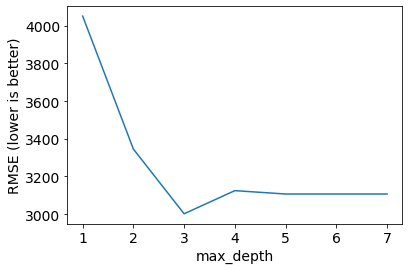

In [17]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [18]:
# max_depth=3 was best, so fit a tree using that parameter.
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [19]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature.
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,vtype,0.000000


### Creating a Tree Diagram

In [20]:
# Create a Graphviz file.
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='assets/images/tree_vehicles.dot', feature_names=feature_cols)


<img src="assets/images/tree_vehicles.png" style="width:80%" />

Reading the internal nodes:

- **samples:** Number of observations in that node before splitting.
- **mse:** MSE calculated by comparing the actual response values in that node against the mean response value in that node.
- **rule:** Rule used to split that node (go left if true, go right if false).



<img src="assets/images/tree_vehicles.png" style="width:80%" />

Reading the leaves:

- **samples:** Number of observations in that node.
- **value:** Mean response value in that node.
- **mse:** MSE calculated by comparing the actual response values in that node against "value."

<a id="testing-preds"></a>
### Making Predictions for the Testing Data

In [21]:
# Read the testing data.
path = 'assets/data/vehicles_test.csv'

test = pd.read_csv(path)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [22]:
# Use fitted model to make predictions on testing data.
X_test = test[feature_cols]
y_test = test.price
y_pred = treereg.predict(X_test)

y_pred

array([ 4000.,  5000., 13500.])

In [23]:
# Calculate RMSE

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1190.2380714238084

In [24]:
# Calculate RMSE for your own tree.
y_test = [3000, 6000, 12000]
y_pred = [0, 0, 0]

from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

7937.253933193771


## <font style = 'color:blue'> Summary: Comparing Decision Trees With Other Models</font>



**Advantages of decision trees:**

- They can be used for regression or classification.
- They can be displayed graphically.
- They are highly interpretable.
- They can be specified as a series of rules, and more closely approximate human decision-making than other models.
- Prediction is fast.
- Their features don't need scaling.
- They authomatically learn feature interactions.
- Tends to ignore irrelevant features.
- They are non-parametric (i.e. will outperform linear models if the relationship between features and response is highly non-linear).

**Disadvantages of decision trees:**

- Their performance is (generally) not competitive with the best supervised learning methods.
- They can easily overfit the training data (tuning is required).
- Small variations in the data can result in a completely different tree (high variance).
- Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree.
- They don't tend to work well if the classes are highly unbalanced.
- They don't tend to work well with very small data sets.